In [1]:
import numpy as np

In [2]:
with open('numpy arrays/covid.npy', 'rb') as f:
    covid = np.load(f, allow_pickle=True)

covid.shape

(3615, 2)

In [4]:
with open('numpy arrays/bacterial_pneumonia.npy', 'rb') as f:
    bacterial_pneumonia = np.load(f, allow_pickle=True)

bacterial_pneumonia.shape

(2530, 2)

In [5]:
with open('numpy arrays/viral_pneumonia.npy', 'rb') as f:
    viral_pneumonia = np.load(f, allow_pickle=True)

viral_pneumonia.shape

(1345, 2)

In [33]:
viral_pneumonia[0].shape
viral_pneumonia = np.repeat(viral_pneumonia, 3, axis=0)
viral_pneumonia = viral_pneumonia[:3500]

In [34]:
viral_pneumonia.shape

(3500, 2)

In [6]:
with open('numpy arrays/tb.npy', 'rb') as f:
    tb = np.load(f, allow_pickle=True)

tb.shape

(3500, 2)

In [7]:
with open('numpy arrays/normal.npy', 'rb') as f:
    normal = np.load(f, allow_pickle=True)

normal.shape

(1341, 2)

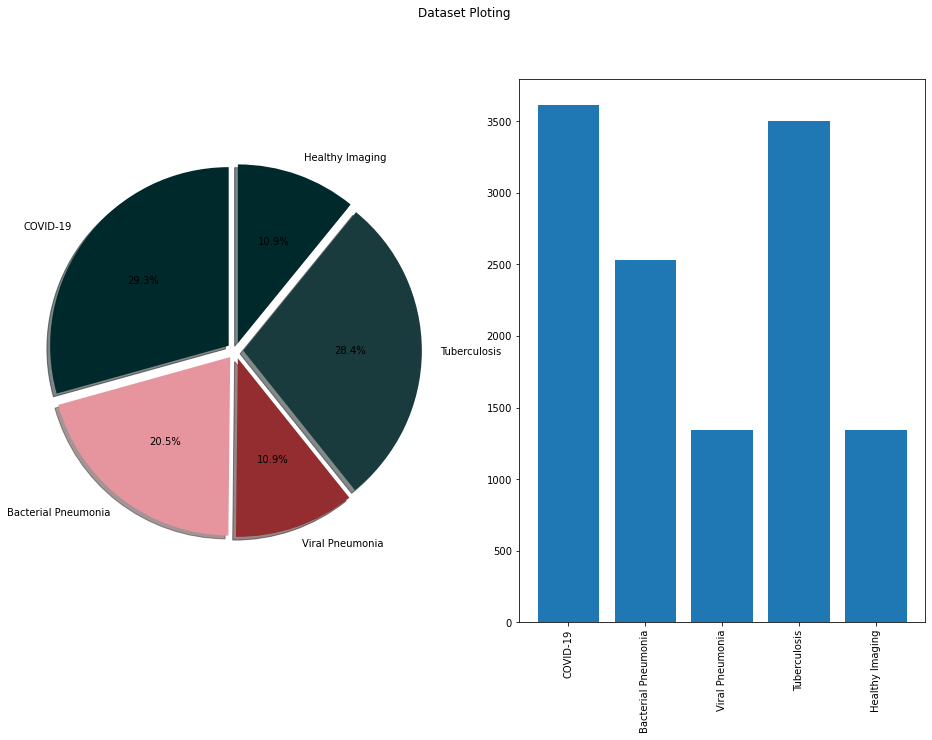

In [10]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

values = [covid.shape[0],bacterial_pneumonia.shape[0],viral_pneumonia.shape[0],tb.shape[0],normal.shape[0]]
labels = ['COVID-19', 'Bacterial Pneumonia', 'Viral Pneumonia', 'Tuberculosis', 'Healthy Imaging']

explode = (0.05,0.05,0.05,0.05,0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig, ax1 = plt.subplots(1,2, figsize=(16,10
                                      ))
ax1[0].pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
      shadow=True, startangle=90, radius=1.1, colors=[(0,.16,.17),(.9,.58,.62),(.58,.175,.185), (.100,.233,.238)])
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1[1].bar(height=values,x=labels)
plt.xticks(rotation=90)

# Add a title to the Figure
fig.suptitle('Dataset Ploting')

plt.show()

Some imbalance!

Since this dataset was collected with the intention to classify only covid and non covid(binary classification) something we'll be covering soon, cases we are seeing show a very high imbalance.

we need to find a way to balance our data. lets take a look at over and under sampling using the image below. 

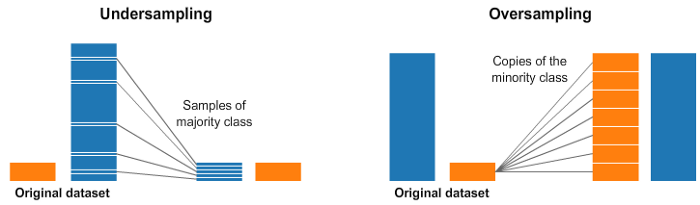

In both the left and right side of the image above, our blue class has far more samples than the orange class. 
Undersampling means we will select only some of the data from the majority class, only using as many examples as the minority class has.
Oversampling means that we will create copies of our minority class in order to have the same number of examples as the majority class has. The copies will be made such that the distribution of the minority class is maintained. 

In [35]:
viral_pneumonia = np.repeat(viral_pneumonia, 3, axis=0)
viral_pneumonia = viral_pneumonia[:3500]
bacterial_pneumonia = np.repeat(bacterial_pneumonia, 2, axis=0)
bacterial_pneumonia = bacterial_pneumonia[:3500]
normal = np.repeat(normal, 3, axis=0)
normal = normal[:3500]

In [37]:
normal.shape

(3500, 2)

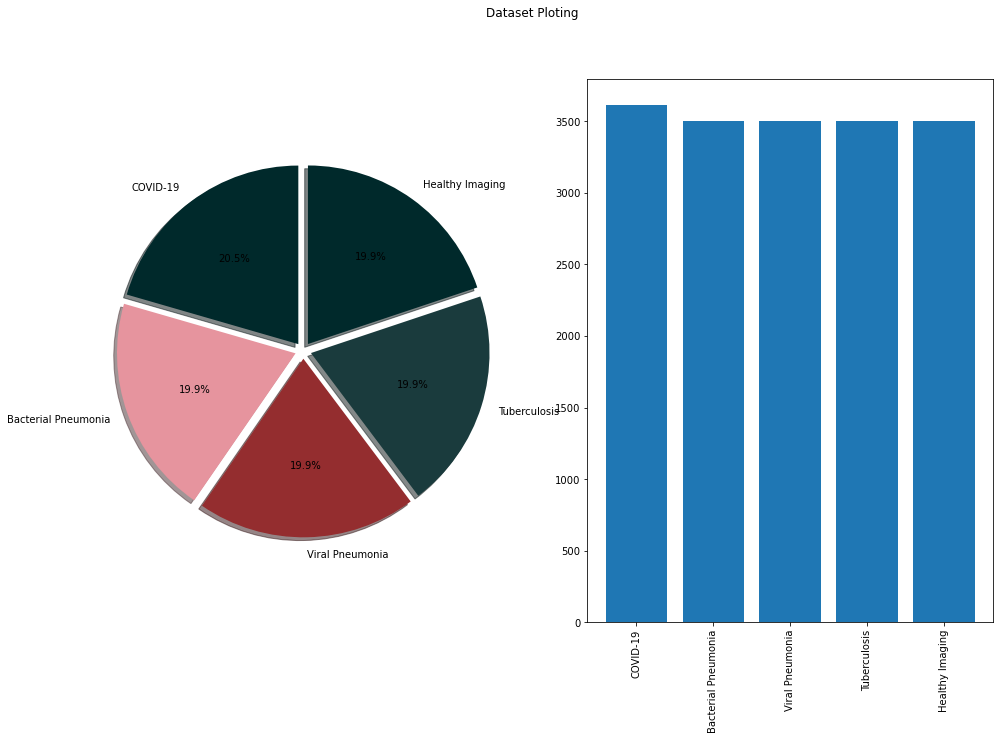

In [39]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

values = [covid.shape[0],bacterial_pneumonia.shape[0],viral_pneumonia.shape[0],tb.shape[0],normal.shape[0]]
labels = ['COVID-19', 'Bacterial Pneumonia', 'Viral Pneumonia', 'Tuberculosis', 'Healthy Imaging']

explode = (0.05,0.05,0.05,0.05,0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig, ax1 = plt.subplots(1,2, figsize=(16,10
                                      ))
ax1[0].pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
      shadow=True, startangle=90, radius=1.1, colors=[(0,.16,.17),(.9,.58,.62),(.58,.175,.185), (.100,.233,.238)])
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1[1].bar(height=values,x=labels)
plt.xticks(rotation=90)

# Add a title to the Figure
fig.suptitle('Dataset Ploting')

plt.show()

In [40]:
data_covid = covid
data_bacterial_pneumonia = bacterial_pneumonia
data_viral_pneumonia = viral_pneumonia
data_tb = tb
data_normal = normal

print(len(data_covid))

data = np.concatenate((data_covid, data_bacterial_pneumonia, data_viral_pneumonia, data_tb, data_normal),)
X = []
y = []
for image in data:
  X.append(image[0])
  y.append(image[1])

# converting x & y to numpy array as they are list
X = np.array(X)
y = np.array(y)

3615


In [41]:
X.shape

(17615, 100, 100)

In [47]:
with open('numpy arrays/X.npy', 'wb') as f:
    np.save(f, X)
    print('X numpy array saved in X.npy')
with open('numpy arrays/y.npy','wb') as f:
    np.save(f, y)
    print('y numpy array saved in y.npy')

X numpy array saved in X.npy
y numpy array saved in y.npy


In [42]:
y.shape

(17615,)

In [48]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42, stratify=y)

In [49]:
X_train = X_train / 255
X_test = X_test / 255

"""
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '